In [1]:
# -------------------------------
# SECTION 1: ML Mindset & Problem Framing
# -------------------------------

print("Welcome to the Ride Price ML Project!")
print("\nTask 1: ML Mindset & Problem Framing")

print("\nLearning Problem:")
print("We aim to predict the price of a ride and classify rides as high-cost or low-cost based on historical ride features.\n")

print("Why ML instead of fixed rules?")
print("- Ride pricing depends on multiple factors (distance, time, location, ride type).")
print("- Hard-coded rules like 'price = distance * 2' cannot capture complex patterns.")
print("- ML learns patterns from historical data and can adapt to new scenarios.\n")

print("Model Goals:")
print("- Regression: Predict actual ride prices.")
print("- Classification: Predict if a ride is high-cost (above median price).\n")

input("Press Enter to proceed to Data Exploration & Understanding...")


Welcome to the Ride Price ML Project!

Task 1: ML Mindset & Problem Framing

Learning Problem:
We aim to predict the price of a ride and classify rides as high-cost or low-cost based on historical ride features.

Why ML instead of fixed rules?
- Ride pricing depends on multiple factors (distance, time, location, ride type).
- Hard-coded rules like 'price = distance * 2' cannot capture complex patterns.
- ML learns patterns from historical data and can adapt to new scenarios.

Model Goals:
- Regression: Predict actual ride prices.
- Classification: Predict if a ride is high-cost (above median price).



''

Loaded dataset with shape: (200, 14)

First 5 rows of the dataset:


,distance_km,duration_min,time_of_day,traffic_level,weather_condition,demand_level,vehicle_type,day_of_week,pickup_zone,dropoff_zone,fuel_price_index,driver_rating,special_event,ride_price
0,11.86,38.95,Morning,Medium,Clear,7,Sedan,Weekend,Airport,Suburb,99.84,4.32,No,157.52
1,28.57,61.95,Afternoon,Medium,Clear,5,Luxury,Weekend,City Center,City Center,80.51,4.42,No,209.33
2,22.23,51.64,Morning,Medium,Clear,3,Mini,Weekday,City Center,City Center,119.70,3.84,No,121.30
3,18.36,69.72,Morning,High,Clear,3,Mini,Weekday,City Center,City Center,106.86,4.77,No,141.06
4,5.52,17.75,Afternoon,Medium,Clear,4,Mini,Weekday,Suburb,City Center,92.68,4.14,Yes,88.62



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance_km        200 non-null    float64
 1   duration_min       200 non-null    float64
 2   time_of_day        200 non-null    object 
 3   traffic_level      200 non-null    object 
 4   weather_condition  200 non-null    object 
 5   demand_level       200 non-null    int64  
 6   vehicle_type       200 non-null    object 
 7   day_of_week        200 non-null    object 
 8   pickup_zone        200 non-null    object 
 9   dropoff_zone       200 non-null    object 
 10  fuel_price_index   200 non-null    float64
 11  driver_rating      200 non-null    float64
 12  special_event      200 non-null    object 
 13  ride_price         200 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 22.0+ KB
None

Dataset Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
distance_km,200.0,15.03630,8.551856,1.16,7.6325,15.340,22.9475,29.62
duration_min,200.0,45.10590,26.963632,3.02,24.2925,39.955,67.2450,104.57
demand_level,200.0,5.56500,2.942630,1.00,3.0000,6.000,8.0000,10.00
fuel_price_index,200.0,99.93050,11.723714,80.08,89.0175,100.890,109.8525,119.70
driver_rating,200.0,4.23700,0.442445,3.50,3.8475,4.205,4.6325,5.00
ride_price,200.0,145.41605,53.501920,44.65,103.4775,139.020,180.6550,300.28



Columns with missing values:
Series([], dtype: float64)

Visualizing first numerical column distribution...


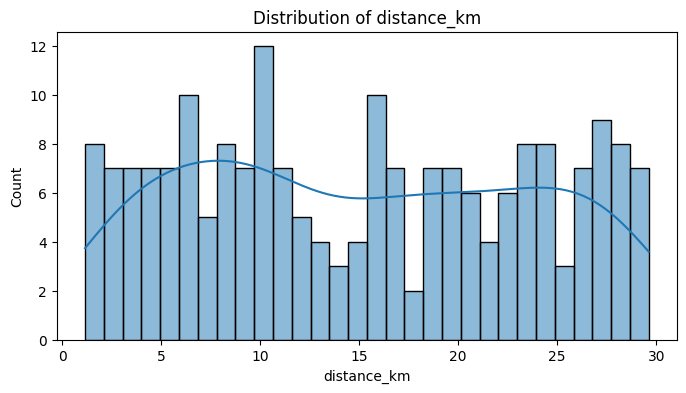

''

In [ ]:
# -------------------------------
# SECTION 2: Data Exploration & Understanding
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "../data/rides.csv"
df = pd.read_csv(data_path, low_memory=False)

print(f"Loaded dataset with shape: {df.shape}\n")
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nDataset Summary Statistics:")
display(df.describe().T)

# Missing values
missing_frac = df.isnull().mean()
print("\nColumns with missing values:")
print(missing_frac[missing_frac > 0])

# Quick visualization
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'ride_price' in numeric_cols:
    numeric_cols.remove('ride_price')

if numeric_cols:
    print("\nVisualizing first numerical column distribution...")
    plt.figure(figsize=(8,4))
    sns.histplot(df[numeric_cols[0]], kde=True, bins=30)
    plt.title(f'Distribution of {numeric_cols[0]}')
    plt.show()

input("Press Enter to proceed to Dataset Justification...")


In [ ]:
# -------------------------------
# SECTION 2.1: Dataset Justification
# -------------------------------

print("📋 Dataset Justification for Ride Price Prediction\n")

# Full list of features considered
features = [
    "Distance (km)",
    "Trip duration (minutes)",
    "Time of day",
    "Traffic level",
    "Weather condition",
    "Demand level",
    "Vehicle type",
    "Day of week",
    "Pickup zone",
    "Dropoff zone",
    "Fuel price",
    "Driver rating",
    "Special events"
]

# Explain why each feature was chosen
print("✅ Features Included and Why:\n")

# Numeric Features
print("Numeric Features:")
print("  • Distance (km): Longer trips cost more.")
print("  • Trip duration (minutes): Longer duration increases fare.")
print("  • Fuel price: Higher fuel cost can increase pricing.")
print("  • Driver rating: Could influence willingness to take premium rides.\n")

# Categorical/Contextual Features
print("Categorical/Contextual Features:")
print("  • Time of day: Peak vs off-peak hours affect price.")
print("  • Traffic level: Heavy traffic may increase trip duration and cost.")
print("  • Weather condition: Bad weather may cause slower trips or surge pricing.")
print("  • Demand level: High demand may increase ride price (surge).")
print("  • Vehicle type: Premium vehicles cost more than standard ones.")
print("  • Day of week: Weekend or holidays may have higher pricing.")
print("  • Pickup zone: Certain zones are more expensive.")
print("  • Dropoff zone: Some destinations may have higher pricing.")
print("  • Special events: Events (concerts, sports) can spike demand and price.\n")

# Feature excluded example
excluded_feature = "Driver personal preference"
print(f"❌ Feature Excluded: {excluded_feature}")
print("  • Reason: Not consistently recorded; including it could introduce noise.\n")

# How features influence ride price
print("💡 How Each Feature Might Influence Ride Price:\n")
for f in features:
    print(f"  • {f}")

print("\n✅ Including these features helps the model learn realistic pricing patterns influenced by distance, time, traffic, demand, vehicle type, zones, fuel costs, driver rating, and special events.")

input("Press Enter to continue to Data Cleaning & Feature Engineering...")


In [3]:
# -------------------------------
# SECTION 3: Data Cleaning & Feature Engineering
# -------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# Handle target column naming
if 'ride_price' in df.columns:
    df.rename(columns={'ride_price': 'price'}, inplace=True)

# Drop columns with >40% missing values
cols_to_drop = missing_frac[missing_frac > 0.4].index.tolist()
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Dropped columns with >40% missing values: {cols_to_drop}")

# Separate numeric and categorical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'price' in numeric_cols:
    numeric_cols.remove('price')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Handle outliers
for c in numeric_cols + ['price']:
    if c in df.columns:
        p1, p99 = df[c].quantile(0.01), df[c].quantile(0.99)
        df[c] = np.clip(df[c], p1, p99)
print("\nOutliers clipped at 1st and 99th percentile.")

# Preprocessing pipelines
num_pipe = Pipeline([('imp', SimpleImputer(strategy='median')), ('sc', StandardScaler())])
cat_pipe = Pipeline([('imp', SimpleImputer(strategy='most_frequent')), 
                     ('oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, categorical_cols)
])

print("\nPreprocessing pipelines created for numeric and categorical features.")

input("Press Enter to proceed to Regression Model...")



Numeric columns: ['distance_km', 'duration_min', 'demand_level', 'fuel_price_index', 'driver_rating']
Categorical columns: ['time_of_day', 'traffic_level', 'weather_condition', 'vehicle_type', 'day_of_week', 'pickup_zone', 'dropoff_zone', 'special_event']

Outliers clipped at 1st and 99th percentile.

Preprocessing pipelines created for numeric and categorical features.


''

Regression RMSE: 9.983
Regression R²: 0.945


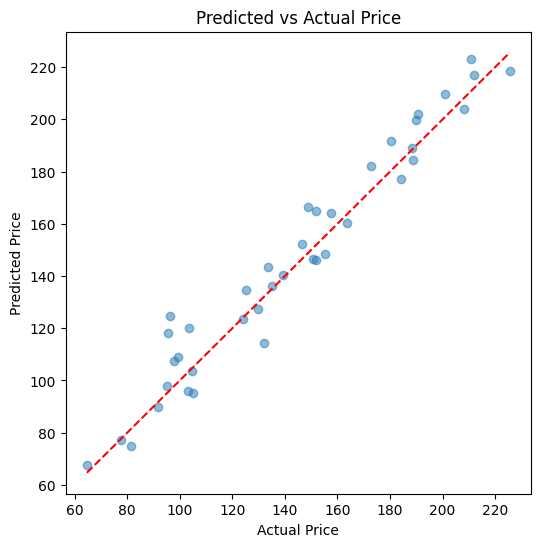

''

In [4]:
# -------------------------------
# SECTION 4: Regression Model – Price Prediction
# -------------------------------

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = Pipeline([('prep', preprocessor), ('model', LinearRegression())])
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Regression RMSE: {rmse:.3f}")
print(f"Regression R²: {r2:.3f}")

# Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

input("Press Enter to proceed to Classification Model...")


Classification Accuracy: 0.875

Confusion Matrix:
 [[18  1]
 [ 4 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.94      0.81      0.87        21

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



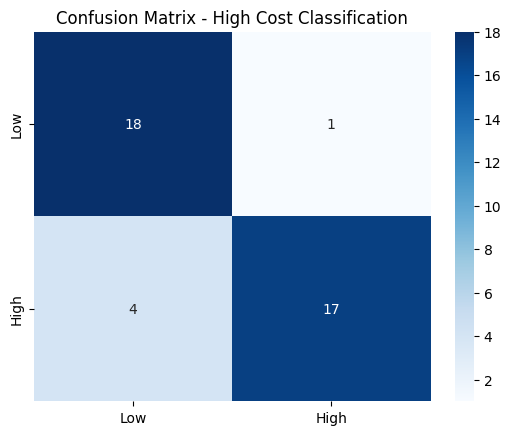

''

In [5]:
# -------------------------------
# SECTION 5: Classification Model – High-Cost vs Low-Cost
# -------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create binary target
threshold = y.median()
df['high_cost'] = (df['price'] > threshold).astype(int)

Xc = df.drop(columns=['price', 'high_cost'])
yc = df['high_cost']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

clf = Pipeline([('prep', preprocessor), ('model', LogisticRegression(max_iter=1000, solver='liblinear'))])
clf.fit(Xc_train, yc_train)

yc_pred = clf.predict(Xc_test)

acc = accuracy_score(yc_test, yc_pred)
print(f"Classification Accuracy: {acc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(yc_test, yc_pred))
print("\nClassification Report:\n", classification_report(yc_test, yc_pred))

# Heatmap
sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low','High'], yticklabels=['Low','High'])
plt.title('Confusion Matrix - High Cost Classification')
plt.show()

input("Press Enter to proceed to Model Evaluation & Comparison...")


In [6]:
# -------------------------------
# SECTION 6: Model Evaluation & Feature Importance
# -------------------------------

import numpy as np

print("Regression Model Evaluation:")
print(f"- RMSE: {rmse:.3f}")
print(f"- R²: {r2:.3f}")

print("\nClassification Model Evaluation:")
print(f"- Accuracy: {acc:.3f}")

# Feature importance for regression (numeric only)
reg_model = reg.named_steps['model']
preproc_features = numeric_cols + list(reg.named_steps['prep'].named_transformers_['cat'].named_steps['oh'].get_feature_names_out(categorical_cols))
coef_df = pd.DataFrame({'Feature': preproc_features, 'Coefficient': reg_model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 most influential features for regression:")
display(coef_df.head(10))

input("Press Enter to proceed to Ethical & Practical Reflection...")


Regression Model Evaluation:
- RMSE: 9.983
- R²: 0.945

Classification Model Evaluation:
- Accuracy: 0.875

Top 10 most influential features for regression:


,Feature,Coefficient
15,vehicle_type_Luxury,35.420001
0,distance_km,27.963295
16,vehicle_type_Mini,-25.704909
21,pickup_zone_Airport,23.795664
27,special_event_No,-20.964510
28,special_event_Yes,20.964510
1,duration_min,17.185720
22,pickup_zone_City Center,-16.542240
18,vehicle_type_Sedan,-11.637517
24,dropoff_zone_City Center,-8.255785


''

In [7]:
# -------------------------------
# SECTION 7: Ethical & Practical Reflection + Save Predictions
# -------------------------------

print("Ethical & Practical Reflection:")

print("\n1. Potential unfair pricing:")
print("- Certain neighborhoods or time slots may consistently have higher predicted prices due to biased historical data.")

print("\n2. Real-world risk:")
print("- Incorrect predictions could lead to overcharging or misclassification of rides, impacting customer trust.")

print("\n3. Dataset limitation:")
print("- Dataset may be incomplete, biased, or missing critical features like surge pricing, weather, or demand.\n")

# Save regression predictions
preds = X_test.copy()
preds['actual_price'] = y_test.values
preds['predicted_price'] = y_pred
preds.to_csv('../predictions_sample.csv', index=False)
print("Regression predictions saved to 'predictions_sample.csv'.\n")

print("All tasks completed! 🎉")


Ethical & Practical Reflection:

1. Potential unfair pricing:
- Certain neighborhoods or time slots may consistently have higher predicted prices due to biased historical data.

2. Real-world risk:
- Incorrect predictions could lead to overcharging or misclassification of rides, impacting customer trust.

3. Dataset limitation:
- Dataset may be incomplete, biased, or missing critical features like surge pricing, weather, or demand.

Regression predictions saved to 'predictions_sample.csv'.

All tasks completed! 🎉
